In [68]:
import pandas as pd 
import numpy as np

import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics

In [69]:
df = pd.read_csv('input.csv',delim_whitespace=True)
df.head()



,ID,Type,CISD1,G6PD,AKR1C3,HSBP1,ALOX5,ACO1,PHKG2,PGD,GSS,STEAP3,GCLM,PEBP1,CBS,AIFM2,ALOX12,ABCC1,KEAP1,CS
0,GSM1539119_con,Normal,8.795816,8.273098,8.238499,8.706207,8.540995,7.301146,7.237659,10.501995,7.314575,6.760666,7.269242,8.385940,6.888328,6.727363,7.306877,6.765464,7.483634,8.562655
1,GSM1539120_con,Normal,8.699967,8.194936,7.897531,9.035012,8.604370,7.478337,7.215443,10.235847,7.127705,6.725173,7.232673,8.533798,7.184849,6.702617,7.316006,6.777152,7.300943,8.610914
2,GSM1539121_con,Normal,8.325783,8.236834,8.105612,8.747281,8.577156,7.545336,7.259039,9.971817,7.505986,6.688136,7.348975,7.968376,7.113454,6.814376,6.993295,6.760981,7.493011,8.584417
3,GSM1539122_con,Normal,8.626391,8.220537,8.185611,8.784318,8.667452,7.610433,7.099580,10.328776,7.253972,6.675609,7.247410,7.980878,6.975176,6.751035,7.669748,6.756492,7.326599,8.542854
4,GSM1539123_con,Normal,8.650741,8.012726,7.832104,9.005201,8.614420,7.437102,6.994591,10.129801,7.270759,6.707308,7.216582,7.850519,6.869509,6.643639,7.341164,6.767811,7.406798,8.743702


In [70]:
df =  df[df.columns].replace({'Tumor':1, 'Normal':0, })


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716 entries, 0 to 715
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      716 non-null    object 
 1   Type    716 non-null    int64  
 2   CISD1   716 non-null    float64
 3   G6PD    716 non-null    float64
 4   AKR1C3  716 non-null    float64
 5   HSBP1   716 non-null    float64
 6   ALOX5   716 non-null    float64
 7   ACO1    716 non-null    float64
 8   PHKG2   716 non-null    float64
 9   PGD     716 non-null    float64
 10  GSS     716 non-null    float64
 11  STEAP3  716 non-null    float64
 12  GCLM    716 non-null    float64
 13  PEBP1   716 non-null    float64
 14  CBS     716 non-null    float64
 15  AIFM2   716 non-null    float64
 16  ALOX12  716 non-null    float64
 17  ABCC1   716 non-null    float64
 18  KEAP1   716 non-null    float64
 19  CS      716 non-null    float64
dtypes: float64(18), int64(1), object(1)
memory usage: 112.0+ KB


In [72]:
import statsmodels.api as sm
train_label = df.columns[1:2]

train_cols = df.columns[2:]

X_test = train_label
y_test = train_cols

logit = sm.Logit(df[train_label], df[train_cols])

result = logit.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.550709
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                   Type   No. Observations:                  716
Model:                          Logit   Df Residuals:                      698
Method:                           MLE   Df Model:                           17
Date:                Sun, 10 Jul 2022   Pseudo R-squ.:                  0.1352
Time:                        21:01:46   Log-Likelihood:                -394.31
converged:                       True   LL-Null:                       -455.97
Covariance Type:            nonrobust   LLR p-value:                 3.563e-18
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
CISD1         -1.6853      0.464     -3.632      0.000      -2.595      -0.776
G6PD           1.0406      0.

In [73]:
from sklearn.preprocessing import OneHotEncoder 
enc = OneHotEncoder() 

# Encoding categorical features 
# categ = df[['AgeCategory', 'Race', 'GenHealth']]
# encoded_categ = pd.DataFrame(enc.fit_transform(categ).toarray())

#Likning the encoed_cateh with the df
# df = pd.concat([df, encoded_categ], axis = 1)

# Dropping the categorical features
df0 = df.drop(columns = ['ID','G6PD','AKR1C3','HSBP1','ALOX5','ACO1','PHKG2','PGD','GSS','STEAP3','GCLM','PEBP1','CBS','AIFM2','ALOX12','ABCC1','KEAP1','CS'], axis = 1)
df1 = df.drop(columns = ['ID','CISD1','AKR1C3','HSBP1','ALOX5','ACO1','PHKG2','PGD','GSS','STEAP3','GCLM','PEBP1','CBS','AIFM2','ALOX12','ABCC1','KEAP1','CS'], axis = 1)
df2 = df.drop(columns = ['ID','CISD1','G6PD','HSBP1','ALOX5','ACO1','PHKG2','PGD','GSS','STEAP3','GCLM','PEBP1','CBS','AIFM2','ALOX12','ABCC1','KEAP1','CS'], axis = 1)
df3 = df.drop(columns = ['ID','CISD1','G6PD','AKR1C3','ALOX5','ACO1','PHKG2','PGD','GSS','STEAP3','GCLM','PEBP1','CBS','AIFM2','ALOX12','ABCC1','KEAP1','CS'], axis = 1)
df4 = df.drop(columns = ['ID','CISD1','G6PD','AKR1C3','HSBP1','ACO1','PHKG2','PGD','GSS','STEAP3','GCLM','PEBP1','CBS','AIFM2','ALOX12','ABCC1','KEAP1','CS'], axis = 1)
df5 = df.drop(columns = ['ID','CISD1','G6PD','AKR1C3','HSBP1','ALOX5','PHKG2','PGD','GSS','STEAP3','GCLM','PEBP1','CBS','AIFM2','ALOX12','ABCC1','KEAP1','CS'], axis = 1)
df6 = df.drop(columns = ['ID','CISD1','G6PD','AKR1C3','HSBP1','ALOX5','ACO1','PGD','GSS','STEAP3','GCLM','PEBP1','CBS','AIFM2','ALOX12','ABCC1','KEAP1','CS'], axis = 1)
df7 = df.drop(columns = ['ID','CISD1','G6PD','AKR1C3','HSBP1','ALOX5','ACO1','PHKG2','GSS','STEAP3','GCLM','PEBP1','CBS','AIFM2','ALOX12','ABCC1','KEAP1','CS'], axis = 1)
df8 = df.drop(columns = ['ID','CISD1','G6PD','AKR1C3','HSBP1','ALOX5','ACO1','PHKG2','PGD','STEAP3','GCLM','PEBP1','CBS','AIFM2','ALOX12','ABCC1','KEAP1','CS'], axis = 1)
df9 = df.drop(columns = ['ID','CISD1','G6PD','AKR1C3','HSBP1','ALOX5','ACO1','PHKG2','PGD','GSS','GCLM','PEBP1','CBS','AIFM2','ALOX12','ABCC1','KEAP1','CS'], axis = 1)
df10 = df.drop(columns = ['ID','CISD1','G6PD','AKR1C3','HSBP1','ALOX5','ACO1','PHKG2','PGD','GSS','STEAP3','PEBP1','CBS','AIFM2','ALOX12','ABCC1','KEAP1','CS'], axis = 1)
df11 = df.drop(columns = ['ID','CISD1','G6PD','AKR1C3','HSBP1','ALOX5','ACO1','PHKG2','PGD','GSS','STEAP3','GCLM','CBS','AIFM2','ALOX12','ABCC1','KEAP1','CS'], axis = 1)
df12 = df.drop(columns = ['ID','CISD1','G6PD','AKR1C3','HSBP1','ALOX5','ACO1','PHKG2','PGD','GSS','STEAP3','GCLM','PEBP1','AIFM2','ALOX12','ABCC1','KEAP1','CS'], axis = 1)
df13 = df.drop(columns = ['ID','CISD1','G6PD','AKR1C3','HSBP1','ALOX5','ACO1','PHKG2','PGD','GSS','STEAP3','GCLM','PEBP1','CBS','ALOX12','ABCC1','KEAP1','CS'], axis = 1)
df14 = df.drop(columns = ['ID','CISD1','G6PD','AKR1C3','HSBP1','ALOX5','ACO1','PHKG2','PGD','GSS','STEAP3','GCLM','PEBP1','CBS','AIFM2','ABCC1','KEAP1','CS'], axis = 1)
df15 = df.drop(columns = ['ID','CISD1','G6PD','AKR1C3','HSBP1','ALOX5','ACO1','PHKG2','PGD','GSS','STEAP3','GCLM','PEBP1','CBS','AIFM2','ALOX12','KEAP1','CS'], axis = 1)
df16 = df.drop(columns = ['ID','CISD1','G6PD','AKR1C3','HSBP1','ALOX5','ACO1','PHKG2','PGD','GSS','STEAP3','GCLM','PEBP1','CBS','AIFM2','ALOX12','ABCC1','CS'], axis = 1)
df17 = df.drop(columns = ['ID','CISD1','G6PD','AKR1C3','HSBP1','ALOX5','ACO1','PHKG2','PGD','GSS','STEAP3','GCLM','PEBP1','CBS','AIFM2','ALOX12','ABCC1','KEAP1'], axis = 1)
df18 = df.drop(columns = ['ID'], axis = 1)


# CISD1         -1.6853      0.464     -3.632      0.000      -2.595      -0.776
# HSBP1         -1.6595      0.509     -3.262      0.001      -2.657      -0.662
# PGD           -1.1922      0.477     -2.497      0.013      -2.128      -0.257
# GSS            2.5334      0.857      2.956      0.003       0.853       4.213
# GCLM           3.1088      0.948      3.279      0.001       1.251       4.967
# PEBP1         -1.2300      0.391     -3.142      0.002      -1.997      -0.463
# CS            -2.8360      0.876     -3.237      0.001      -4.553      -1.119

# df0 = df.drop(columns = ['ID','CISD1','G6PD','AKR1C3','HSBP1','ALOX5','ACO1','PHKG2','PGD','GSS','STEAP3','GCLM','PEBP1','CBS','AIFM2','ALOX12','ABCC1','KEAP1','CS'], axis = 1)
# 1   Type    716 non-null    int64  
#  2   CISD1   716 non-null    float64
#  3   G6PD    716 non-null    float64
#  4   AKR1C3  716 non-null    float64
#  5   HSBP1   716 non-null    float64
#  6   ALOX5   716 non-null    float64
#  7   ACO1    716 non-null    float64
#  8   PHKG2   716 non-null    float64
#  9   PGD     716 non-null    float64
#  10  GSS     716 non-null    float64
#  11  STEAP3  716 non-null    float64
#  12  GCLM    716 non-null    float64
#  13  PEBP1   716 non-null    float64
#  14  CBS     716 non-null    float64
#  15  AIFM2   716 non-null    float64
#  16  ALOX12  716 non-null    float64
#  17  ABCC1   716 non-null    float64
#  18  KEAP1   716 non-null    float64
#  19  CS      716 non-null    float64




In [74]:
#Select Features
features = df0.drop(columns =['Type'], axis = 1)

#Select Target 
target = df0['Type']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train0, X_test0, y_train0, y_test0 = train_test_split(features, target, shuffle = True, test_size = .2, random_state = 44)


print('Shape of training feature:', X_train0.shape)
print('Shape of testing feature:', X_test0.shape)
print('Shape of training label:', y_train0.shape)
print('Shape of training label:', y_test0.shape)

Shape of training feature: (572, 1)
Shape of testing feature: (144, 1)
Shape of training label: (572,)
Shape of training label: (144,)


In [75]:
#Select Features
features = df1.drop(columns =['Type'], axis = 1)

#Select Target 
target = df1['Type']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(features, target, shuffle = True, test_size = .2, random_state = 44)


print('Shape of training feature:', X_train1.shape)
print('Shape of testing feature:', X_test1.shape)
print('Shape of training label:', y_train1.shape)
print('Shape of training label:', y_test1.shape)

Shape of training feature: (572, 1)
Shape of testing feature: (144, 1)
Shape of training label: (572,)
Shape of training label: (144,)


In [76]:
#Select Features
features = df2.drop(columns =['Type'], axis = 1)

#Select Target 
target = df2['Type']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(features, target, shuffle = True, test_size = .2, random_state = 44)


print('Shape of training feature:', X_train2.shape)
print('Shape of testing feature:', X_test2.shape)
print('Shape of training label:', y_train2.shape)
print('Shape of training label:', y_test2.shape)

Shape of training feature: (572, 1)
Shape of testing feature: (144, 1)
Shape of training label: (572,)
Shape of training label: (144,)


In [77]:
#Select Features
features = df3.drop(columns =['Type'], axis = 1)

#Select Target 
target = df3['Type']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train3, X_test3, y_train3, y_test3 = train_test_split(features, target, shuffle = True, test_size = .2, random_state = 44)


print('Shape of training feature:', X_train3.shape)
print('Shape of testing feature:', X_test3.shape)
print('Shape of training label:', y_train3.shape)
print('Shape of training label:', y_test3.shape)

Shape of training feature: (572, 1)
Shape of testing feature: (144, 1)
Shape of training label: (572,)
Shape of training label: (144,)


In [78]:
#Select Features
features = df4.drop(columns =['Type'], axis = 1)

#Select Target 
target = df4['Type']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train4, X_test4, y_train4, y_test4 = train_test_split(features, target, shuffle = True, test_size = .2, random_state = 44)


print('Shape of training feature:', X_train4.shape)
print('Shape of testing feature:', X_test4.shape)
print('Shape of training label:', y_train4.shape)
print('Shape of training label:', y_test4.shape)

Shape of training feature: (572, 1)
Shape of testing feature: (144, 1)
Shape of training label: (572,)
Shape of training label: (144,)


In [79]:
#Select Features
features = df5.drop(columns =['Type'], axis = 1)

#Select Target 
target = df5['Type']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train5, X_test5, y_train5, y_test5 = train_test_split(features, target, shuffle = True, test_size = .2, random_state = 44)


print('Shape of training feature:', X_train5.shape)
print('Shape of testing feature:', X_test5.shape)
print('Shape of training label:', y_train5.shape)
print('Shape of training label:', y_test5.shape)

Shape of training feature: (572, 1)
Shape of testing feature: (144, 1)
Shape of training label: (572,)
Shape of training label: (144,)


In [80]:
#Select Features
features = df6.drop(columns =['Type'], axis = 1)

#Select Target
target = df6['Type']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train6, X_test6, y_train6, y_test6 = train_test_split(features, target, shuffle = True, test_size = .2, random_state = 44)


print('Shape of training feature:', X_train6.shape)
print('Shape of testing feature:', X_test6.shape)
print('Shape of training label:', y_train6.shape)
print('Shape of training label:', y_test6.shape)

Shape of training feature: (572, 1)
Shape of testing feature: (144, 1)
Shape of training label: (572,)
Shape of training label: (144,)


In [81]:
#Select Features
features = df7.drop(columns =['Type'], axis = 1)

#Select Target
target = df7['Type']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train7, X_test7, y_train7, y_test7 = train_test_split(features, target, shuffle = True, test_size = .2, random_state = 44)


print('Shape of training feature:', X_train7.shape)
print('Shape of testing feature:', X_test7.shape)
print('Shape of training label:', y_train7.shape)
print('Shape of training label:', y_test7.shape)

Shape of training feature: (572, 1)
Shape of testing feature: (144, 1)
Shape of training label: (572,)
Shape of training label: (144,)


In [82]:
#Select Features
features = df8.drop(columns =['Type'], axis = 1)

#Select Target 
target = df8['Type']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train8, X_test8, y_train8, y_test8 = train_test_split(features, target, shuffle = True, test_size = .2, random_state = 44)


print('Shape of training feature:', X_train8.shape)
print('Shape of testing feature:', X_test8.shape)
print('Shape of training label:', y_train8.shape)
print('Shape of training label:', y_test8.shape)

Shape of training feature: (572, 1)
Shape of testing feature: (144, 1)
Shape of training label: (572,)
Shape of training label: (144,)


In [83]:
#Select Features
features = df9.drop(columns =['Type'], axis = 1)

#Select Target 
target = df9['Type']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train9, X_test9, y_train9, y_test9 = train_test_split(features, target, shuffle = True, test_size = .2, random_state = 44)


print('Shape of training feature:', X_train9.shape)
print('Shape of testing feature:', X_test9.shape)
print('Shape of training label:', y_train9.shape)
print('Shape of training label:', y_test9.shape)

Shape of training feature: (572, 1)
Shape of testing feature: (144, 1)
Shape of training label: (572,)
Shape of training label: (144,)


In [84]:
#Select Features
features = df10.drop(columns =['Type'], axis = 1)

#Select Target 
target = df10['Type']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train10, X_test10, y_train10, y_test10 = train_test_split(features, target, shuffle = True, test_size = .2, random_state = 44)


print('Shape of training feature:', X_train10.shape)
print('Shape of testing feature:', X_test10.shape)
print('Shape of training label:', y_train10.shape)
print('Shape of training label:', y_test10.shape)

Shape of training feature: (572, 1)
Shape of testing feature: (144, 1)
Shape of training label: (572,)
Shape of training label: (144,)


In [85]:
#Select Features
features = df11.drop(columns =['Type'], axis = 1)

#Select Target 
target = df11['Type']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train11, X_test11, y_train11, y_test11 = train_test_split(features, target, shuffle = True, test_size = .2, random_state = 44)


print('Shape of training feature:', X_train11.shape)
print('Shape of testing feature:', X_test11.shape)
print('Shape of training label:', y_train11.shape)
print('Shape of training label:', y_test11.shape)

Shape of training feature: (572, 1)
Shape of testing feature: (144, 1)
Shape of training label: (572,)
Shape of training label: (144,)


In [86]:
#Select Features
features = df12.drop(columns =['Type'], axis = 1)

#Select Target 
target = df12['Type']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train12, X_test12, y_train12, y_test12 = train_test_split(features, target, shuffle = True, test_size = .2, random_state = 44)


print('Shape of training feature:', X_train12.shape)
print('Shape of testing feature:', X_test12.shape)
print('Shape of training label:', y_train12.shape)
print('Shape of training label:', y_test12.shape)

Shape of training feature: (572, 1)
Shape of testing feature: (144, 1)
Shape of training label: (572,)
Shape of training label: (144,)


In [87]:
#Select Features
features = df13.drop(columns =['Type'], axis = 1)

#Select Target 
target = df13['Type']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train13, X_test13, y_train13, y_test13 = train_test_split(features, target, shuffle = True, test_size = .2, random_state = 44)


print('Shape of training feature:', X_train13.shape)
print('Shape of testing feature:', X_test13.shape)
print('Shape of training label:', y_train13.shape)
print('Shape of training label:', y_test13.shape)

Shape of training feature: (572, 1)
Shape of testing feature: (144, 1)
Shape of training label: (572,)
Shape of training label: (144,)


In [88]:
#Select Features
features = df14.drop(columns =['Type'], axis = 1)

#Select Target
target = df14['Type']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train14, X_test14, y_train14, y_test14 = train_test_split(features, target, shuffle = True, test_size = .2, random_state = 44)


print('Shape of training feature:', X_train14.shape)
print('Shape of testing feature:', X_test14.shape)
print('Shape of training label:', y_train14.shape)
print('Shape of training label:', y_test14.shape)

Shape of training feature: (572, 1)
Shape of testing feature: (144, 1)
Shape of training label: (572,)
Shape of training label: (144,)


In [89]:
#Select Features
features = df15.drop(columns =['Type'], axis = 1)

#Select Target 
target = df15['Type']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train15, X_test15, y_train15, y_test15 = train_test_split(features, target, shuffle = True, test_size = .2, random_state = 44)


print('Shape of training feature:', X_train15.shape)
print('Shape of testing feature:', X_test15.shape)
print('Shape of training label:', y_train15.shape)
print('Shape of training label:', y_test15.shape)

Shape of training feature: (572, 1)
Shape of testing feature: (144, 1)
Shape of training label: (572,)
Shape of training label: (144,)


In [90]:
#Select Features
features = df16.drop(columns =['Type'], axis = 1)

#Select Target 
target = df16['Type']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train16, X_test16, y_train16, y_test16 = train_test_split(features, target, shuffle = True, test_size = .2, random_state = 44)


print('Shape of training feature:', X_train16.shape)
print('Shape of testing feature:', X_test16.shape)
print('Shape of training label:', y_train16.shape)
print('Shape of training label:', y_test16.shape)

Shape of training feature: (572, 1)
Shape of testing feature: (144, 1)
Shape of training label: (572,)
Shape of training label: (144,)


In [91]:
#Select Features
features = df17.drop(columns =['Type'], axis = 1)

#Select Target 
target = df17['Type']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train17, X_test17, y_train17, y_test17 = train_test_split(features, target, shuffle = True, test_size = .2, random_state = 44)


print('Shape of training feature:', X_train17.shape)
print('Shape of testing feature:', X_test17.shape)
print('Shape of training label:', y_train17.shape)
print('Shape of training label:', y_test17.shape)

Shape of training feature: (572, 1)
Shape of testing feature: (144, 1)
Shape of training label: (572,)
Shape of training label: (144,)


In [92]:
#Select Features
features = df18.drop(columns =['Type'], axis = 1)

#Select Target 
target = df18['Type']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train18, X_test18, y_train18, y_test18 = train_test_split(features, target, shuffle = True, test_size = .2, random_state = 44)


print('Shape of training feature:', X_train18.shape)
print('Shape of testing feature:', X_test18.shape)
print('Shape of training label:', y_train18.shape)
print('Shape of training label:', y_test18.shape)

Shape of training feature: (572, 18)
Shape of testing feature: (144, 18)
Shape of training label: (572,)
Shape of training label: (144,)


建模

In [93]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred0 = model.predict(X_test0)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test0, y_pred0)
    prec = metrics.precision_score(y_test0, y_pred0)
    rec = metrics.recall_score(y_test0, y_pred0)
    f1 = metrics.f1_score(y_test0, y_pred0)
    kappa = metrics.cohen_kappa_score(y_test0, y_pred0)

    # Calculate area under curve (AUC)
    y_pred_proba0 = model.predict_proba(X_test0)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test0, y_pred_proba0)
    auc = metrics.roc_auc_score(y_test0, y_pred_proba0)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test0, y_pred0)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [94]:
LR0 = LogisticRegression()
LR0.fit(X_train0, y_train0)

LR_eval0 = evaluate_model(LR0, X_test0, y_test0)

print('Accuracy:', LR_eval0['acc'])
print('Precision:', LR_eval0['prec'])
print('Recall:', LR_eval0['rec'])
print('F1 Score:', LR_eval0['f1'])
print('Cohens Kappa Score:', LR_eval0['kappa'])
print('Area Under Curve:', LR_eval0['auc'])
print('Confusion Matrix:\n', LR_eval0['cm'])


Accuracy: 0.6458333333333334
Precision: 0.6538461538461539
Recall: 0.9340659340659341
F1 Score: 0.7692307692307693
Cohens Kappa Score: 0.10044096031357175
Area Under Curve: 0.6722993987144931
Confusion Matrix:
 [[ 8 45]
 [ 6 85]]


In [95]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred1 = model.predict(X_test1)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test1, y_pred1)
    prec = metrics.precision_score(y_test1, y_pred1)
    rec = metrics.recall_score(y_test1, y_pred1)
    f1 = metrics.f1_score(y_test1, y_pred1)
    kappa = metrics.cohen_kappa_score(y_test1, y_pred1)

    # Calculate area under curve (AUC)
    y_pred_proba1 = model.predict_proba(X_test1)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test1, y_pred_proba1)
    auc = metrics.roc_auc_score(y_test1, y_pred_proba1)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test1, y_pred1)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [96]:
LR1 = LogisticRegression()
LR1.fit(X_train1, y_train1)

LR_eval1 = evaluate_model(LR1, X_test1, y_test1)

print('Accuracy:', LR_eval1['acc'])
print('Precision:', LR_eval1['prec'])
print('Recall:', LR_eval1['rec'])
print('F1 Score:', LR_eval1['f1'])
print('Cohens Kappa Score:', LR_eval1['kappa'])
print('Area Under Curve:', LR_eval1['auc'])
print('Confusion Matrix:\n', LR_eval1['cm'])


Accuracy: 0.6111111111111112
Precision: 0.624113475177305
Recall: 0.967032967032967
F1 Score: 0.7586206896551724
Cohens Kappa Score: -0.041053446940356286
Area Under Curve: 0.6749948165042504
Confusion Matrix:
 [[ 0 53]
 [ 3 88]]


In [97]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred2 = model.predict(X_test2)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test2, y_pred2)
    prec = metrics.precision_score(y_test2, y_pred2)
    rec = metrics.recall_score(y_test2, y_pred2)
    f1 = metrics.f1_score(y_test2, y_pred2)
    kappa = metrics.cohen_kappa_score(y_test2, y_pred2)

    # Calculate area under curve (AUC)
    y_pred_proba2 = model.predict_proba(X_test2)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test2, y_pred_proba2)
    auc = metrics.roc_auc_score(y_test2, y_pred_proba2)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test2, y_pred2)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [98]:
LR2 = LogisticRegression()
LR2.fit(X_train2, y_train2)

LR_eval2 = evaluate_model(LR2, X_test2, y_test2)

print('Accuracy:', LR_eval2['acc'])
print('Precision:', LR_eval2['prec'])
print('Recall:', LR_eval2['rec'])
print('F1 Score:', LR_eval2['f1'])
print('Cohens Kappa Score:', LR_eval2['kappa'])
print('Area Under Curve:', LR_eval2['auc'])
print('Confusion Matrix:\n', LR_eval2['cm'])


Accuracy: 0.6458333333333334
Precision: 0.644927536231884
Recall: 0.978021978021978
F1 Score: 0.7772925764192139
Cohens Kappa Score: 0.06564885496183193
Area Under Curve: 0.6009744972009123
Confusion Matrix:
 [[ 4 49]
 [ 2 89]]


In [99]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred3 = model.predict(X_test3)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test3, y_pred3)
    prec = metrics.precision_score(y_test3, y_pred3)
    rec = metrics.recall_score(y_test3, y_pred3)
    f1 = metrics.f1_score(y_test3, y_pred3)
    kappa = metrics.cohen_kappa_score(y_test3, y_pred3)

    # Calculate area under curve (AUC)
    y_pred_proba3 = model.predict_proba(X_test3)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test3, y_pred_proba3)
    auc = metrics.roc_auc_score(y_test3, y_pred_proba3)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test3, y_pred3)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [100]:
LR3 = LogisticRegression()
LR3.fit(X_train3, y_train3)

LR_eval3 = evaluate_model(LR3, X_test3, y_test3)

print('Accuracy:', LR_eval3['acc'])
print('Precision:', LR_eval3['prec'])
print('Recall:', LR_eval3['rec'])
print('F1 Score:', LR_eval3['f1'])
print('Cohens Kappa Score:', LR_eval3['kappa'])
print('Area Under Curve:', LR_eval3['auc'])
print('Confusion Matrix:\n', LR_eval3['cm'])


Accuracy: 0.6319444444444444
Precision: 0.6357142857142857
Recall: 0.978021978021978
F1 Score: 0.7705627705627704
Cohens Kappa Score: 0.019527235354573458
Area Under Curve: 0.5843873108024051
Confusion Matrix:
 [[ 2 51]
 [ 2 89]]


In [101]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred4 = model.predict(X_test4)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test4, y_pred4)
    prec = metrics.precision_score(y_test4, y_pred4)
    rec = metrics.recall_score(y_test4, y_pred4)
    f1 = metrics.f1_score(y_test4, y_pred4)
    kappa = metrics.cohen_kappa_score(y_test4, y_pred4)

    # Calculate area under curve (AUC)
    y_pred_proba4 = model.predict_proba(X_test4)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test4, y_pred_proba4)
    auc = metrics.roc_auc_score(y_test4, y_pred_proba4)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test4, y_pred4)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [102]:
LR4 = LogisticRegression()
LR4.fit(X_train4, y_train4)

LR_eval4 = evaluate_model(LR4, X_test4, y_test4)

print('Accuracy:', LR_eval4['acc'])
print('Precision:', LR_eval4['prec'])
print('Recall:', LR_eval4['rec'])
print('F1 Score:', LR_eval4['f1'])
print('Cohens Kappa Score:', LR_eval4['kappa'])
print('Area Under Curve:', LR_eval4['auc'])
print('Confusion Matrix:\n', LR_eval4['cm'])


Accuracy: 0.6180555555555556
Precision: 0.6267605633802817
Recall: 0.978021978021978
F1 Score: 0.7639484978540774
Cohens Kappa Score: -0.02750389206019732
Area Under Curve: 0.6247149077337757
Confusion Matrix:
 [[ 0 53]
 [ 2 89]]


In [103]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred5 = model.predict(X_test5)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test5, y_pred5)
    prec = metrics.precision_score(y_test5, y_pred5)
    rec = metrics.recall_score(y_test5, y_pred5)
    f1 = metrics.f1_score(y_test5, y_pred5)
    kappa = metrics.cohen_kappa_score(y_test5, y_pred5)

    # Calculate area under curve (AUC)
    y_pred_proba5 = model.predict_proba(X_test5)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test5, y_pred_proba5)
    auc = metrics.roc_auc_score(y_test5, y_pred_proba5)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test5, y_pred5)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [104]:
LR5 = LogisticRegression()
LR5.fit(X_train5, y_train5)

LR_eval5 = evaluate_model(LR5, X_test5, y_test5)

print('Accuracy:', LR_eval5['acc'])
print('Precision:', LR_eval5['prec'])
print('Recall:', LR_eval5['rec'])
print('F1 Score:', LR_eval5['f1'])
print('Cohens Kappa Score:', LR_eval5['kappa'])
print('Area Under Curve:', LR_eval5['auc'])
print('Confusion Matrix:\n', LR_eval5['cm'])


Accuracy: 0.6319444444444444
Precision: 0.6319444444444444
Recall: 1.0
F1 Score: 0.774468085106383
Cohens Kappa Score: 0.0
Area Under Curve: 0.624300228073813
Confusion Matrix:
 [[ 0 53]
 [ 0 91]]


In [105]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred6 = model.predict(X_test6)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test6, y_pred6)
    prec = metrics.precision_score(y_test6, y_pred6)
    rec = metrics.recall_score(y_test6, y_pred6)
    f1 = metrics.f1_score(y_test6, y_pred6)
    kappa = metrics.cohen_kappa_score(y_test6, y_pred6)

    # Calculate area under curve (AUC)
    y_pred_proba6 = model.predict_proba(X_test6)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test6, y_pred_proba6)
    auc = metrics.roc_auc_score(y_test6, y_pred_proba6)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test6, y_pred6)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [106]:
LR6 = LogisticRegression()
LR6.fit(X_train6, y_train6)

LR_eval6 = evaluate_model(LR6, X_test6, y_test6)

print('Accuracy:', LR_eval6['acc'])
print('Precision:', LR_eval6['prec'])
print('Recall:', LR_eval6['rec'])
print('F1 Score:', LR_eval6['f1'])
print('Cohens Kappa Score:', LR_eval6['kappa'])
print('Area Under Curve:', LR_eval6['auc'])
print('Confusion Matrix:\n', LR_eval6['cm'])


Accuracy: 0.6458333333333334
Precision: 0.6408450704225352
Recall: 1.0
F1 Score: 0.7811158798283262
Cohens Kappa Score: 0.04722366372599884
Area Under Curve: 0.5871863985071533
Confusion Matrix:
 [[ 2 51]
 [ 0 91]]


In [107]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred7 = model.predict(X_test7)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test7, y_pred7)
    prec = metrics.precision_score(y_test7, y_pred7)
    rec = metrics.recall_score(y_test7, y_pred7)
    f1 = metrics.f1_score(y_test7, y_pred7)
    kappa = metrics.cohen_kappa_score(y_test7, y_pred7)

    # Calculate area under curve (AUC)
    y_pred_proba7 = model.predict_proba(X_test7)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test7, y_pred_proba7)
    auc = metrics.roc_auc_score(y_test7, y_pred_proba7)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test7, y_pred7)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [108]:
LR7 = LogisticRegression()
LR7.fit(X_train7, y_train7)

LR_eval7 = evaluate_model(LR7, X_test7, y_test7)

print('Accuracy:', LR_eval7['acc'])
print('Precision:', LR_eval7['prec'])
print('Recall:', LR_eval7['rec'])
print('F1 Score:', LR_eval7['f1'])
print('Cohens Kappa Score:', LR_eval7['kappa'])
print('Area Under Curve:', LR_eval7['auc'])
print('Confusion Matrix:\n', LR_eval7['cm'])


Accuracy: 0.6319444444444444
Precision: 0.6338028169014085
Recall: 0.989010989010989
F1 Score: 0.7725321888412018
Cohens Kappa Score: 0.009859885832900761
Area Under Curve: 0.6485589881816296
Confusion Matrix:
 [[ 1 52]
 [ 1 90]]


In [109]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred8 = model.predict(X_test8)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test8, y_pred8)
    prec = metrics.precision_score(y_test8, y_pred8)
    rec = metrics.recall_score(y_test8, y_pred8)
    f1 = metrics.f1_score(y_test8, y_pred8)
    kappa = metrics.cohen_kappa_score(y_test8, y_pred8)

    # Calculate area under curve (AUC)
    y_pred_proba8 = model.predict_proba(X_test8)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test8, y_pred_proba8)
    auc = metrics.roc_auc_score(y_test8, y_pred_proba8)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test8, y_pred8)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [110]:
LR8 = LogisticRegression()
LR8.fit(X_train8, y_train8)

LR_eval8 = evaluate_model(LR8, X_test8, y_test8)

print('Accuracy:', LR_eval8['acc'])
print('Precision:', LR_eval8['prec'])
print('Recall:', LR_eval8['rec'])
print('F1 Score:', LR_eval8['f1'])
print('Cohens Kappa Score:', LR_eval8['kappa'])
print('Area Under Curve:', LR_eval8['auc'])
print('Confusion Matrix:\n', LR_eval8['cm'])


Accuracy: 0.6319444444444444
Precision: 0.6319444444444444
Recall: 1.0
F1 Score: 0.774468085106383
Cohens Kappa Score: 0.0
Area Under Curve: 0.6314534522081692
Confusion Matrix:
 [[ 0 53]
 [ 0 91]]


In [111]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred9 = model.predict(X_test9)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test9, y_pred9)
    prec = metrics.precision_score(y_test9, y_pred9)
    rec = metrics.recall_score(y_test9, y_pred9)
    f1 = metrics.f1_score(y_test9, y_pred9)
    kappa = metrics.cohen_kappa_score(y_test9, y_pred9)

    # Calculate area under curve (AUC)
    y_pred_proba9 = model.predict_proba(X_test9)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test9, y_pred_proba9)
    auc = metrics.roc_auc_score(y_test9, y_pred_proba9)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test9, y_pred9)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [112]:
LR9 = LogisticRegression()
LR9.fit(X_train9, y_train9)

LR_eval9 = evaluate_model(LR9, X_test9, y_test9)

print('Accuracy:', LR_eval9['acc'])
print('Precision:', LR_eval9['prec'])
print('Recall:', LR_eval9['rec'])
print('F1 Score:', LR_eval9['f1'])
print('Cohens Kappa Score:', LR_eval9['kappa'])
print('Area Under Curve:', LR_eval9['auc'])
print('Confusion Matrix:\n', LR_eval9['cm'])


Accuracy: 0.6319444444444444
Precision: 0.6319444444444444
Recall: 1.0
F1 Score: 0.774468085106383
Cohens Kappa Score: 0.0
Area Under Curve: 0.5627202985693551
Confusion Matrix:
 [[ 0 53]
 [ 0 91]]


In [113]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred10 = model.predict(X_test10)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test10, y_pred10)
    prec = metrics.precision_score(y_test10, y_pred10)
    rec = metrics.recall_score(y_test10, y_pred10)
    f1 = metrics.f1_score(y_test10, y_pred10)
    kappa = metrics.cohen_kappa_score(y_test10, y_pred10)

    # Calculate area under curve (AUC)
    y_pred_proba10 = model.predict_proba(X_test10)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test10, y_pred_proba10)
    auc = metrics.roc_auc_score(y_test10, y_pred_proba10)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test10, y_pred10)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [114]:
LR10 = LogisticRegression()
LR10.fit(X_train10, y_train10)

LR_eval10 = evaluate_model(LR10, X_test10, y_test10)

print('Accuracy:', LR_eval10['acc'])
print('Precision:', LR_eval10['prec'])
print('Recall:', LR_eval10['rec'])
print('F1 Score:', LR_eval10['f1'])
print('Cohens Kappa Score:', LR_eval10['kappa'])
print('Area Under Curve:', LR_eval10['auc'])
print('Confusion Matrix:\n', LR_eval10['cm'])


Accuracy: 0.6319444444444444
Precision: 0.6319444444444444
Recall: 1.0
F1 Score: 0.774468085106383
Cohens Kappa Score: 0.0
Area Under Curve: 0.5891561268919759
Confusion Matrix:
 [[ 0 53]
 [ 0 91]]


In [115]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred11 = model.predict(X_test11)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test11, y_pred11)
    prec = metrics.precision_score(y_test11, y_pred11)
    rec = metrics.recall_score(y_test11, y_pred11)
    f1 = metrics.f1_score(y_test11, y_pred11)
    kappa = metrics.cohen_kappa_score(y_test11, y_pred11)

    # Calculate area under curve (AUC)
    y_pred_proba11 = model.predict_proba(X_test11)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test11, y_pred_proba11)
    auc = metrics.roc_auc_score(y_test11, y_pred_proba11)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test11, y_pred11)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [116]:
LR11 = LogisticRegression()
LR11.fit(X_train11, y_train11)

LR_eval11 = evaluate_model(LR11, X_test11, y_test11)

print('Accuracy:', LR_eval11['acc'])
print('Precision:', LR_eval11['prec'])
print('Recall:', LR_eval11['rec'])
print('F1 Score:', LR_eval11['f1'])
print('Cohens Kappa Score:', LR_eval11['kappa'])
print('Area Under Curve:', LR_eval11['auc'])
print('Confusion Matrix:\n', LR_eval11['cm'])


Accuracy: 0.6319444444444444
Precision: 0.6319444444444444
Recall: 1.0
F1 Score: 0.774468085106383
Cohens Kappa Score: 0.0
Area Under Curve: 0.5822102425876011
Confusion Matrix:
 [[ 0 53]
 [ 0 91]]


In [117]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred12 = model.predict(X_test12)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test12, y_pred12)
    prec = metrics.precision_score(y_test12, y_pred12)
    rec = metrics.recall_score(y_test12, y_pred12)
    f1 = metrics.f1_score(y_test12, y_pred12)
    kappa = metrics.cohen_kappa_score(y_test12, y_pred12)

    # Calculate area under curve (AUC)
    y_pred_proba12 = model.predict_proba(X_test12)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test12, y_pred_proba12)
    auc = metrics.roc_auc_score(y_test12, y_pred_proba12)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test12, y_pred12)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [118]:
LR12 = LogisticRegression()
LR12.fit(X_train12, y_train12)

LR_eval12 = evaluate_model(LR12, X_test12, y_test12)

print('Accuracy:', LR_eval12['acc'])
print('Precision:', LR_eval12['prec'])
print('Recall:', LR_eval12['rec'])
print('F1 Score:', LR_eval12['f1'])
print('Cohens Kappa Score:', LR_eval12['kappa'])
print('Area Under Curve:', LR_eval12['auc'])
print('Confusion Matrix:\n', LR_eval12['cm'])


Accuracy: 0.6319444444444444
Precision: 0.6319444444444444
Recall: 1.0
F1 Score: 0.774468085106383
Cohens Kappa Score: 0.0
Area Under Curve: 0.5231183910429194
Confusion Matrix:
 [[ 0 53]
 [ 0 91]]


In [119]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred13 = model.predict(X_test13)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test13, y_pred13)
    prec = metrics.precision_score(y_test13, y_pred13)
    rec = metrics.recall_score(y_test13, y_pred13)
    f1 = metrics.f1_score(y_test13, y_pred13)
    kappa = metrics.cohen_kappa_score(y_test13, y_pred13)

    # Calculate area under curve (AUC)
    y_pred_proba13 = model.predict_proba(X_test13)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test13, y_pred_proba13)
    auc = metrics.roc_auc_score(y_test13, y_pred_proba13)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test13, y_pred13)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa,
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}
            

In [120]:
LR13 = LogisticRegression()
LR13.fit(X_train13, y_train13)

LR_eval13 = evaluate_model(LR13, X_test13, y_test13)

print('Accuracy:', LR_eval13['acc'])
print('Precision:', LR_eval13['prec'])
print('Recall:', LR_eval13['rec'])
print('F1 Score:', LR_eval13['f1'])
print('Cohens Kappa Score:', LR_eval13['kappa'])
print('Area Under Curve:', LR_eval13['auc'])
print('Confusion Matrix:\n', LR_eval13['cm'])


Accuracy: 0.6319444444444444
Precision: 0.6319444444444444
Recall: 1.0
F1 Score: 0.774468085106383
Cohens Kappa Score: 0.0
Area Under Curve: 0.6046029442255858
Confusion Matrix:
 [[ 0 53]
 [ 0 91]]


In [121]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred14 = model.predict(X_test14)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test14, y_pred14)
    prec = metrics.precision_score(y_test14, y_pred14)
    rec = metrics.recall_score(y_test14, y_pred14)
    f1 = metrics.f1_score(y_test14, y_pred14)
    kappa = metrics.cohen_kappa_score(y_test14, y_pred14)

    # Calculate area under curve (AUC)
    y_pred_proba14 = model.predict_proba(X_test14)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test14, y_pred_proba14)
    auc = metrics.roc_auc_score(y_test14, y_pred_proba14)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test14, y_pred14)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa,
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}
            

In [122]:
LR14 = LogisticRegression()
LR14.fit(X_train14, y_train14)

LR_eval14 = evaluate_model(LR14, X_test14, y_test14)

print('Accuracy:', LR_eval14['acc'])
print('Precision:', LR_eval14['prec'])
print('Recall:', LR_eval14['rec'])
print('F1 Score:', LR_eval14['f1'])
print('Cohens Kappa Score:', LR_eval14['kappa'])
print('Area Under Curve:', LR_eval14['auc'])
print('Confusion Matrix:\n', LR_eval14['cm'])


Accuracy: 0.6319444444444444
Precision: 0.6319444444444444
Recall: 1.0
F1 Score: 0.774468085106383
Cohens Kappa Score: 0.0
Area Under Curve: 0.5652083765291313
Confusion Matrix:
 [[ 0 53]
 [ 0 91]]


In [123]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred15 = model.predict(X_test15)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test15, y_pred15)
    prec = metrics.precision_score(y_test15, y_pred15)
    rec = metrics.recall_score(y_test15, y_pred15)
    f1 = metrics.f1_score(y_test15, y_pred15)
    kappa = metrics.cohen_kappa_score(y_test15, y_pred15)

    # Calculate area under curve (AUC)
    y_pred_proba15 = model.predict_proba(X_test15)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test15, y_pred_proba15)
    auc = metrics.roc_auc_score(y_test15, y_pred_proba15)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test15, y_pred15)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa,
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}
            

In [124]:
LR15 = LogisticRegression()
LR15.fit(X_train15, y_train15)

LR_eval15 = evaluate_model(LR15, X_test15, y_test15)

print('Accuracy:', LR_eval15['acc'])
print('Precision:', LR_eval15['prec'])
print('Recall:', LR_eval15['rec'])
print('F1 Score:', LR_eval15['f1'])
print('Cohens Kappa Score:', LR_eval15['kappa'])
print('Area Under Curve:', LR_eval15['auc'])
print('Confusion Matrix:\n', LR_eval15['cm'])


Accuracy: 0.6319444444444444
Precision: 0.6319444444444444
Recall: 1.0
F1 Score: 0.774468085106383
Cohens Kappa Score: 0.0
Area Under Curve: 0.6126891975948581
Confusion Matrix:
 [[ 0 53]
 [ 0 91]]


In [125]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred16 = model.predict(X_test16)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test16, y_pred16)
    prec = metrics.precision_score(y_test16, y_pred16)
    rec = metrics.recall_score(y_test16, y_pred16)
    f1 = metrics.f1_score(y_test16, y_pred16)
    kappa = metrics.cohen_kappa_score(y_test16, y_pred16)

    # Calculate area under curve (AUC)
    y_pred_proba16 = model.predict_proba(X_test16)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test16, y_pred_proba16)
    auc = metrics.roc_auc_score(y_test16, y_pred_proba16)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test16, y_pred16)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa,
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}
            

In [126]:
LR16 = LogisticRegression()
LR16.fit(X_train16, y_train16)

LR_eval16 = evaluate_model(LR16, X_test16, y_test16)

print('Accuracy:', LR_eval16['acc'])
print('Precision:', LR_eval16['prec'])
print('Recall:', LR_eval16['rec'])
print('F1 Score:', LR_eval16['f1'])
print('Cohens Kappa Score:', LR_eval16['kappa'])
print('Area Under Curve:', LR_eval16['auc'])
print('Confusion Matrix:\n', LR_eval16['cm'])


Accuracy: 0.6319444444444444
Precision: 0.6319444444444444
Recall: 1.0
F1 Score: 0.774468085106383
Cohens Kappa Score: 0.0
Area Under Curve: 0.6080240514202779
Confusion Matrix:
 [[ 0 53]
 [ 0 91]]


In [127]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred17 = model.predict(X_test17)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test17, y_pred17)
    prec = metrics.precision_score(y_test17, y_pred17)
    rec = metrics.recall_score(y_test17, y_pred17)
    f1 = metrics.f1_score(y_test17, y_pred17)
    kappa = metrics.cohen_kappa_score(y_test17, y_pred17)

    # Calculate area under curve (AUC)
    y_pred_proba17 = model.predict_proba(X_test17)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test17, y_pred_proba17)
    auc = metrics.roc_auc_score(y_test17, y_pred_proba17)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test17, y_pred17)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa,
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}
            

In [128]:
LR17 = LogisticRegression()
LR17.fit(X_train17, y_train17)

LR_eval17 = evaluate_model(LR17, X_test17, y_test17)

print('Accuracy:', LR_eval17['acc'])
print('Precision:', LR_eval17['prec'])
print('Recall:', LR_eval17['rec'])
print('F1 Score:', LR_eval17['f1'])
print('Cohens Kappa Score:', LR_eval17['kappa'])
print('Area Under Curve:', LR_eval17['auc'])
print('Confusion Matrix:\n', LR_eval17['cm'])


Accuracy: 0.6319444444444444
Precision: 0.6319444444444444
Recall: 1.0
F1 Score: 0.774468085106383
Cohens Kappa Score: 0.0
Area Under Curve: 0.5798258345428158
Confusion Matrix:
 [[ 0 53]
 [ 0 91]]


In [129]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred18 = model.predict(X_test18)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test18, y_pred18)
    prec = metrics.precision_score(y_test18, y_pred18)
    rec = metrics.recall_score(y_test18, y_pred18)
    f1 = metrics.f1_score(y_test18, y_pred18)
    kappa = metrics.cohen_kappa_score(y_test18, y_pred18)

    # Calculate area under curve (AUC)
    y_pred_proba18 = model.predict_proba(X_test18)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test18, y_pred_proba18)
    auc = metrics.roc_auc_score(y_test18, y_pred_proba18)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test18, y_pred18)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa,
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}
            

In [130]:
LR18 = LogisticRegression()
LR18.fit(X_train18, y_train18)

LR_eval18 = evaluate_model(LR18, X_test18, y_test18)

print('Accuracy:', LR_eval18['acc'])
print('Precision:', LR_eval18['prec'])
print('Recall:', LR_eval18['rec'])
print('F1 Score:', LR_eval18['f1'])
print('Cohens Kappa Score:', LR_eval18['kappa'])
print('Area Under Curve:', LR_eval18['auc'])
print('Confusion Matrix:\n', LR_eval18['cm'])


Accuracy: 0.7013888888888888
Precision: 0.6904761904761905
Recall: 0.9560439560439561
F1 Score: 0.8018433179723503
Cohens Kappa Score: 0.2554112554112554
Area Under Curve: 0.7196765498652291
Confusion Matrix:
 [[14 39]
 [ 4 87]]


d:\Things\Code\Anaconda3\envs\For_CNN\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


画图


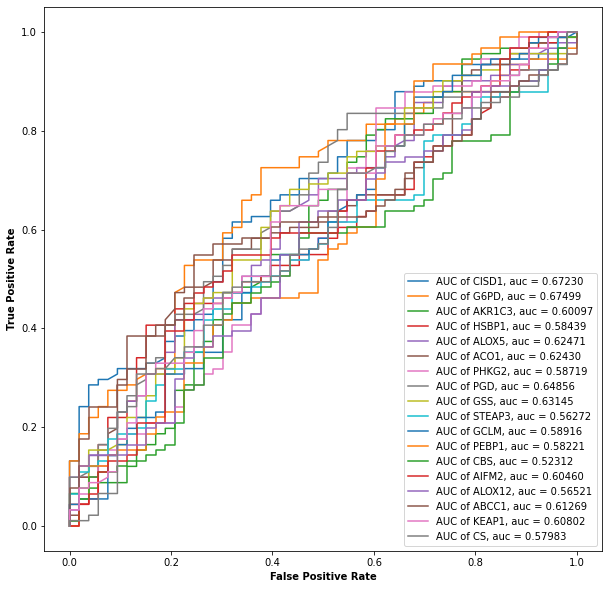

In [131]:
fig, ax = plt.subplots(figsize = (10,10))

fig.set_figheight(10)
fig.set_figwidth(10)
fig.set_facecolor('white')


# CISD1         -1.6853      0.464     -3.632      0.000      -2.595      -0.776
# HSBP1         -1.6595      0.509     -3.262      0.001      -2.657      -0.662
# PGD           -1.1922      0.477     -2.497      0.013      -2.128      -0.257
# GSS            2.5334      0.857      2.956      0.003       0.853       4.213
# GCLM           3.1088      0.948      3.279      0.001       1.251       4.967
# PEBP1         -1.2300      0.391     -3.142      0.002      -1.997      -0.463
# CS            -2.8360      0.876     -3.237      0.001      -4.553      -1.119

# df0 = df.drop(columns = ['ID','CISD1','G6PD','AKR1C3','HSBP1','ALOX5','ACO1','PHKG2','PGD','GSS','STEAP3','GCLM','PEBP1','CBS','AIFM2','ALOX12','ABCC1','KEAP1','CS'], axis = 1)
# 1   Type    716 non-null    int64  
#  2   CISD1   716 non-null    float64
#  3   G6PD    716 non-null    float64
#  4   AKR1C3  716 non-null    float64
#  5   HSBP1   716 non-null    float64
#  6   ALOX5   716 non-null    float64
#  7   ACO1    716 non-null    float64
#  8   PHKG2   716 non-null    float64
#  9   PGD     716 non-null    float64
#  10  GSS     716 non-null    float64
#  11  STEAP3  716 non-null    float64
#  12  GCLM    716 non-null    float64
#  13  PEBP1   716 non-null    float64
#  14  CBS     716 non-null    float64
#  15  AIFM2   716 non-null    float64
#  16  ALOX12  716 non-null    float64
#  17  ABCC1   716 non-null    float64
#  18  KEAP1   716 non-null    float64
#  19  CS      716 non-null    float64

ax.plot(LR_eval0['fpr'], LR_eval0['tpr'], label='AUC of CISD1, auc = {:0.5f}'.format(LR_eval0['auc']))
ax.plot(LR_eval1['fpr'], LR_eval1['tpr'], label='AUC of G6PD, auc = {:0.5f}'.format(LR_eval1['auc']))
ax.plot(LR_eval2['fpr'], LR_eval2['tpr'], label='AUC of AKR1C3, auc = {:0.5f}'.format(LR_eval2['auc']))
ax.plot(LR_eval3['fpr'], LR_eval3['tpr'], label='AUC of HSBP1, auc = {:0.5f}'.format(LR_eval3['auc']))
ax.plot(LR_eval4['fpr'], LR_eval4['tpr'], label='AUC of ALOX5, auc = {:0.5f}'.format(LR_eval4['auc']))
ax.plot(LR_eval5['fpr'], LR_eval5['tpr'], label='AUC of ACO1, auc = {:0.5f}'.format(LR_eval5['auc']))
ax.plot(LR_eval6['fpr'], LR_eval6['tpr'], label='AUC of PHKG2, auc = {:0.5f}'.format(LR_eval6['auc']))
ax.plot(LR_eval7['fpr'], LR_eval7['tpr'], label='AUC of PGD, auc = {:0.5f}'.format(LR_eval7['auc']))
ax.plot(LR_eval8['fpr'], LR_eval8['tpr'], label='AUC of GSS, auc = {:0.5f}'.format(LR_eval8['auc']))
ax.plot(LR_eval9['fpr'], LR_eval9['tpr'], label='AUC of STEAP3, auc = {:0.5f}'.format(LR_eval9['auc']))
ax.plot(LR_eval10['fpr'], LR_eval10['tpr'], label='AUC of GCLM, auc = {:0.5f}'.format(LR_eval10['auc']))
ax.plot(LR_eval11['fpr'], LR_eval11['tpr'], label='AUC of PEBP1, auc = {:0.5f}'.format(LR_eval11['auc']))
ax.plot(LR_eval12['fpr'], LR_eval12['tpr'], label='AUC of CBS, auc = {:0.5f}'.format(LR_eval12['auc']))
ax.plot(LR_eval13['fpr'], LR_eval13['tpr'], label='AUC of AIFM2, auc = {:0.5f}'.format(LR_eval13['auc']))
ax.plot(LR_eval14['fpr'], LR_eval14['tpr'], label='AUC of ALOX12, auc = {:0.5f}'.format(LR_eval14['auc']))
ax.plot(LR_eval15['fpr'], LR_eval15['tpr'], label='AUC of ABCC1, auc = {:0.5f}'.format(LR_eval15['auc']))
ax.plot(LR_eval16['fpr'], LR_eval16['tpr'], label='AUC of KEAP1, auc = {:0.5f}'.format(LR_eval16['auc']))
ax.plot(LR_eval17['fpr'], LR_eval17['tpr'], label='AUC of CS, auc = {:0.5f}'.format(LR_eval17['auc']))
# ax.plot(LR_eval18['fpr'], LR_eval18['tpr'], label='AUC of all 19, auc = {:0.5f}'.format(LR_eval18['auc']))
# ax.plot(LR_eval19['fpr'], LR_eval19['tpr'], label='AUC of all, auc = {:0.5f}'.format(LR_eval19['auc']))

# ax.plot(knn_eval['fpr'], knn_eval['tpr'], label='K-Nearest Nieghbor, auc = {:0.5f}'.format(knn_eval['auc']))

## Configure x and y axis
ax.set_xlabel('False Positive Rate', fontweight='bold')
ax.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax.legend(loc=4)

plt.show()
fig.savefig('19 all AUC.png',dpi=600,bbox_inches='tight')


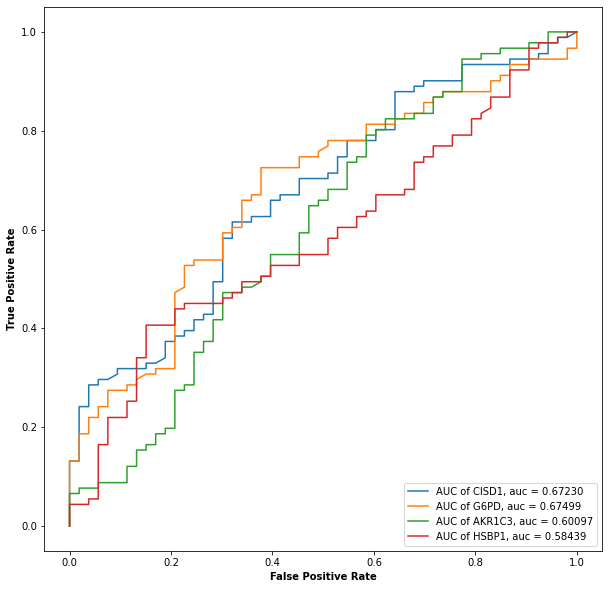

In [132]:
fig, ax = plt.subplots(figsize = (10,10))

fig.set_figheight(10)
fig.set_figwidth(10)
fig.set_facecolor('white')


# CISD1         -1.6853      0.464     -3.632      0.000      -2.595      -0.776
# HSBP1         -1.6595      0.509     -3.262      0.001      -2.657      -0.662
# PGD           -1.1922      0.477     -2.497      0.013      -2.128      -0.257
# GSS            2.5334      0.857      2.956      0.003       0.853       4.213
# GCLM           3.1088      0.948      3.279      0.001       1.251       4.967
# PEBP1         -1.2300      0.391     -3.142      0.002      -1.997      -0.463
# CS            -2.8360      0.876     -3.237      0.001      -4.553      -1.119

# df0 = df.drop(columns = ['ID','CISD1','G6PD','AKR1C3','HSBP1','ALOX5','ACO1','PHKG2','PGD','GSS','STEAP3','GCLM','PEBP1','CBS','AIFM2','ALOX12','ABCC1','KEAP1','CS'], axis = 1)
# 1   Type    716 non-null    int64  
#  2   CISD1   716 non-null    float64
#  3   G6PD    716 non-null    float64
#  4   AKR1C3  716 non-null    float64
#  5   HSBP1   716 non-null    float64
#  6   ALOX5   716 non-null    float64
#  7   ACO1    716 non-null    float64
#  8   PHKG2   716 non-null    float64
#  9   PGD     716 non-null    float64
#  10  GSS     716 non-null    float64
#  11  STEAP3  716 non-null    float64
#  12  GCLM    716 non-null    float64
#  13  PEBP1   716 non-null    float64
#  14  CBS     716 non-null    float64
#  15  AIFM2   716 non-null    float64
#  16  ALOX12  716 non-null    float64
#  17  ABCC1   716 non-null    float64
#  18  KEAP1   716 non-null    float64
#  19  CS      716 non-null    float64

ax.plot(LR_eval0['fpr'], LR_eval0['tpr'], label='AUC of CISD1, auc = {:0.5f}'.format(LR_eval0['auc']))
ax.plot(LR_eval1['fpr'], LR_eval1['tpr'], label='AUC of G6PD, auc = {:0.5f}'.format(LR_eval1['auc']))
ax.plot(LR_eval2['fpr'], LR_eval2['tpr'], label='AUC of AKR1C3, auc = {:0.5f}'.format(LR_eval2['auc']))
ax.plot(LR_eval3['fpr'], LR_eval3['tpr'], label='AUC of HSBP1, auc = {:0.5f}'.format(LR_eval3['auc']))
# ax.plot(LR_eval4['fpr'], LR_eval4['tpr'], label='AUC of ALOX5, auc = {:0.5f}'.format(LR_eval4['auc']))
# ax.plot(LR_eval5['fpr'], LR_eval5['tpr'], label='AUC of ACO1, auc = {:0.5f}'.format(LR_eval5['auc']))
# ax.plot(LR_eval6['fpr'], LR_eval6['tpr'], label='AUC of PHKG2, auc = {:0.5f}'.format(LR_eval6['auc']))
# ax.plot(LR_eval7['fpr'], LR_eval7['tpr'], label='AUC of PGD, auc = {:0.5f}'.format(LR_eval7['auc']))
# ax.plot(LR_eval8['fpr'], LR_eval8['tpr'], label='AUC of GSS, auc = {:0.5f}'.format(LR_eval8['auc']))
# ax.plot(LR_eval9['fpr'], LR_eval9['tpr'], label='AUC of STEAP3, auc = {:0.5f}'.format(LR_eval9['auc']))
# ax.plot(LR_eval10['fpr'], LR_eval10['tpr'], label='AUC of GCLM, auc = {:0.5f}'.format(LR_eval10['auc']))
# ax.plot(LR_eval11['fpr'], LR_eval11['tpr'], label='AUC of PEBP1, auc = {:0.5f}'.format(LR_eval11['auc']))
# ax.plot(LR_eval12['fpr'], LR_eval12['tpr'], label='AUC of CBS, auc = {:0.5f}'.format(LR_eval12['auc']))
# ax.plot(LR_eval13['fpr'], LR_eval13['tpr'], label='AUC of AIFM2, auc = {:0.5f}'.format(LR_eval13['auc']))
# ax.plot(LR_eval14['fpr'], LR_eval14['tpr'], label='AUC of ALOX12, auc = {:0.5f}'.format(LR_eval14['auc']))
# ax.plot(LR_eval15['fpr'], LR_eval15['tpr'], label='AUC of ABCC1, auc = {:0.5f}'.format(LR_eval15['auc']))
# ax.plot(LR_eval16['fpr'], LR_eval16['tpr'], label='AUC of KEAP1, auc = {:0.5f}'.format(LR_eval16['auc']))
# ax.plot(LR_eval17['fpr'], LR_eval17['tpr'], label='AUC of CS, auc = {:0.5f}'.format(LR_eval17['auc']))
# ax.plot(LR_eval18['fpr'], LR_eval18['tpr'], label='AUC of all 19, auc = {:0.5f}'.format(LR_eval18['auc']))
# ax.plot(LR_eval19['fpr'], LR_eval19['tpr'], label='AUC of all, auc = {:0.5f}'.format(LR_eval19['auc']))

# ax.plot(knn_eval['fpr'], knn_eval['tpr'], label='K-Nearest Nieghbor, auc = {:0.5f}'.format(knn_eval['auc']))

## Configure x and y axis
ax.set_xlabel('False Positive Rate', fontweight='bold')
ax.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax.legend(loc=4)

plt.show()
fig.savefig('1-4 all AUC.png',dpi=600,bbox_inches='tight')


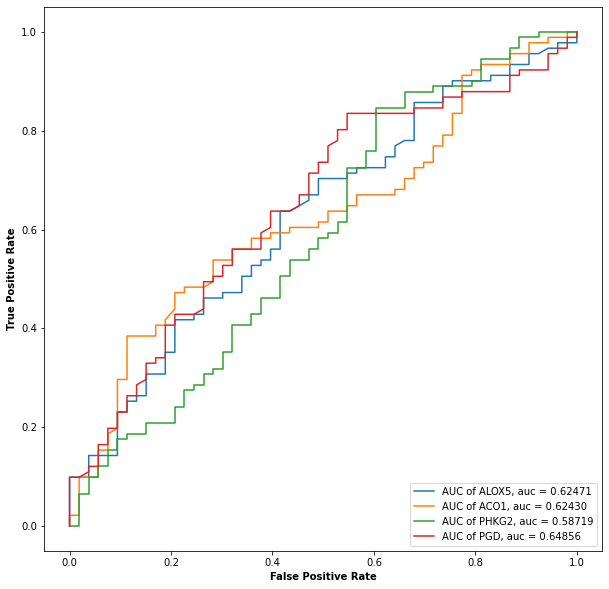

In [133]:
fig, ax = plt.subplots(figsize = (10,10))

fig.set_figheight(10)
fig.set_figwidth(10)
fig.set_facecolor('white')


# CISD1         -1.6853      0.464     -3.632      0.000      -2.595      -0.776
# HSBP1         -1.6595      0.509     -3.262      0.001      -2.657      -0.662
# PGD           -1.1922      0.477     -2.497      0.013      -2.128      -0.257
# GSS            2.5334      0.857      2.956      0.003       0.853       4.213
# GCLM           3.1088      0.948      3.279      0.001       1.251       4.967
# PEBP1         -1.2300      0.391     -3.142      0.002      -1.997      -0.463
# CS            -2.8360      0.876     -3.237      0.001      -4.553      -1.119

# df0 = df.drop(columns = ['ID','CISD1','G6PD','AKR1C3','HSBP1','ALOX5','ACO1','PHKG2','PGD','GSS','STEAP3','GCLM','PEBP1','CBS','AIFM2','ALOX12','ABCC1','KEAP1','CS'], axis = 1)
# 1   Type    716 non-null    int64  
#  2   CISD1   716 non-null    float64
#  3   G6PD    716 non-null    float64
#  4   AKR1C3  716 non-null    float64
#  5   HSBP1   716 non-null    float64
#  6   ALOX5   716 non-null    float64
#  7   ACO1    716 non-null    float64
#  8   PHKG2   716 non-null    float64
#  9   PGD     716 non-null    float64
#  10  GSS     716 non-null    float64
#  11  STEAP3  716 non-null    float64
#  12  GCLM    716 non-null    float64
#  13  PEBP1   716 non-null    float64
#  14  CBS     716 non-null    float64
#  15  AIFM2   716 non-null    float64
#  16  ALOX12  716 non-null    float64
#  17  ABCC1   716 non-null    float64
#  18  KEAP1   716 non-null    float64
#  19  CS      716 non-null    float64

# ax.plot(LR_eval0['fpr'], LR_eval0['tpr'], label='AUC of CISD1, auc = {:0.5f}'.format(LR_eval0['auc']))
# ax.plot(LR_eval1['fpr'], LR_eval1['tpr'], label='AUC of G6PD, auc = {:0.5f}'.format(LR_eval1['auc']))
# ax.plot(LR_eval2['fpr'], LR_eval2['tpr'], label='AUC of AKR1C3, auc = {:0.5f}'.format(LR_eval2['auc']))
# ax.plot(LR_eval3['fpr'], LR_eval3['tpr'], label='AUC of HSBP1, auc = {:0.5f}'.format(LR_eval3['auc']))
ax.plot(LR_eval4['fpr'], LR_eval4['tpr'], label='AUC of ALOX5, auc = {:0.5f}'.format(LR_eval4['auc']))
ax.plot(LR_eval5['fpr'], LR_eval5['tpr'], label='AUC of ACO1, auc = {:0.5f}'.format(LR_eval5['auc']))
ax.plot(LR_eval6['fpr'], LR_eval6['tpr'], label='AUC of PHKG2, auc = {:0.5f}'.format(LR_eval6['auc']))
ax.plot(LR_eval7['fpr'], LR_eval7['tpr'], label='AUC of PGD, auc = {:0.5f}'.format(LR_eval7['auc']))
# ax.plot(LR_eval8['fpr'], LR_eval8['tpr'], label='AUC of GSS, auc = {:0.5f}'.format(LR_eval8['auc']))
# ax.plot(LR_eval9['fpr'], LR_eval9['tpr'], label='AUC of STEAP3, auc = {:0.5f}'.format(LR_eval9['auc']))
# ax.plot(LR_eval10['fpr'], LR_eval10['tpr'], label='AUC of GCLM, auc = {:0.5f}'.format(LR_eval10['auc']))
# ax.plot(LR_eval11['fpr'], LR_eval11['tpr'], label='AUC of PEBP1, auc = {:0.5f}'.format(LR_eval11['auc']))
# ax.plot(LR_eval12['fpr'], LR_eval12['tpr'], label='AUC of CBS, auc = {:0.5f}'.format(LR_eval12['auc']))
# ax.plot(LR_eval13['fpr'], LR_eval13['tpr'], label='AUC of AIFM2, auc = {:0.5f}'.format(LR_eval13['auc']))
# ax.plot(LR_eval14['fpr'], LR_eval14['tpr'], label='AUC of ALOX12, auc = {:0.5f}'.format(LR_eval14['auc']))
# ax.plot(LR_eval15['fpr'], LR_eval15['tpr'], label='AUC of ABCC1, auc = {:0.5f}'.format(LR_eval15['auc']))
# ax.plot(LR_eval16['fpr'], LR_eval16['tpr'], label='AUC of KEAP1, auc = {:0.5f}'.format(LR_eval16['auc']))
# ax.plot(LR_eval17['fpr'], LR_eval17['tpr'], label='AUC of CS, auc = {:0.5f}'.format(LR_eval17['auc']))
# ax.plot(LR_eval18['fpr'], LR_eval18['tpr'], label='AUC of all 19, auc = {:0.5f}'.format(LR_eval18['auc']))
# ax.plot(LR_eval19['fpr'], LR_eval19['tpr'], label='AUC of all, auc = {:0.5f}'.format(LR_eval19['auc']))

# ax.plot(knn_eval['fpr'], knn_eval['tpr'], label='K-Nearest Nieghbor, auc = {:0.5f}'.format(knn_eval['auc']))

## Configure x and y axis
ax.set_xlabel('False Positive Rate', fontweight='bold')
ax.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax.legend(loc=4)

plt.show()
fig.savefig('5-8 all AUC.png',dpi=600,bbox_inches='tight')


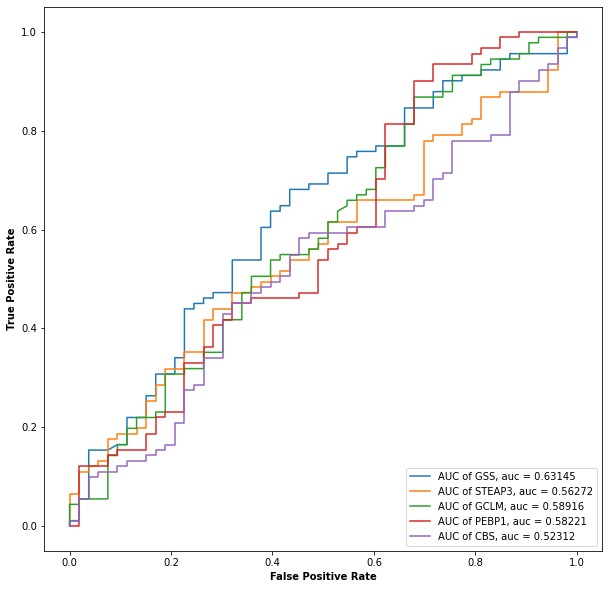

In [134]:
fig, ax = plt.subplots(figsize = (10,10))

fig.set_figheight(10)
fig.set_figwidth(10)
fig.set_facecolor('white')


# CISD1         -1.6853      0.464     -3.632      0.000      -2.595      -0.776
# HSBP1         -1.6595      0.509     -3.262      0.001      -2.657      -0.662
# PGD           -1.1922      0.477     -2.497      0.013      -2.128      -0.257
# GSS            2.5334      0.857      2.956      0.003       0.853       4.213
# GCLM           3.1088      0.948      3.279      0.001       1.251       4.967
# PEBP1         -1.2300      0.391     -3.142      0.002      -1.997      -0.463
# CS            -2.8360      0.876     -3.237      0.001      -4.553      -1.119

# df0 = df.drop(columns = ['ID','CISD1','G6PD','AKR1C3','HSBP1','ALOX5','ACO1','PHKG2','PGD','GSS','STEAP3','GCLM','PEBP1','CBS','AIFM2','ALOX12','ABCC1','KEAP1','CS'], axis = 1)
# 1   Type    716 non-null    int64  
#  2   CISD1   716 non-null    float64
#  3   G6PD    716 non-null    float64
#  4   AKR1C3  716 non-null    float64
#  5   HSBP1   716 non-null    float64
#  6   ALOX5   716 non-null    float64
#  7   ACO1    716 non-null    float64
#  8   PHKG2   716 non-null    float64
#  9   PGD     716 non-null    float64
#  10  GSS     716 non-null    float64
#  11  STEAP3  716 non-null    float64
#  12  GCLM    716 non-null    float64
#  13  PEBP1   716 non-null    float64
#  14  CBS     716 non-null    float64
#  15  AIFM2   716 non-null    float64
#  16  ALOX12  716 non-null    float64
#  17  ABCC1   716 non-null    float64
#  18  KEAP1   716 non-null    float64
#  19  CS      716 non-null    float64

# ax.plot(LR_eval0['fpr'], LR_eval0['tpr'], label='AUC of CISD1, auc = {:0.5f}'.format(LR_eval0['auc']))
# ax.plot(LR_eval1['fpr'], LR_eval1['tpr'], label='AUC of G6PD, auc = {:0.5f}'.format(LR_eval1['auc']))
# ax.plot(LR_eval2['fpr'], LR_eval2['tpr'], label='AUC of AKR1C3, auc = {:0.5f}'.format(LR_eval2['auc']))
# ax.plot(LR_eval3['fpr'], LR_eval3['tpr'], label='AUC of HSBP1, auc = {:0.5f}'.format(LR_eval3['auc']))
# ax.plot(LR_eval4['fpr'], LR_eval4['tpr'], label='AUC of ALOX5, auc = {:0.5f}'.format(LR_eval4['auc']))
# ax.plot(LR_eval5['fpr'], LR_eval5['tpr'], label='AUC of ACO1, auc = {:0.5f}'.format(LR_eval5['auc']))
# ax.plot(LR_eval6['fpr'], LR_eval6['tpr'], label='AUC of PHKG2, auc = {:0.5f}'.format(LR_eval6['auc']))
# ax.plot(LR_eval7['fpr'], LR_eval7['tpr'], label='AUC of PGD, auc = {:0.5f}'.format(LR_eval7['auc']))
ax.plot(LR_eval8['fpr'], LR_eval8['tpr'], label='AUC of GSS, auc = {:0.5f}'.format(LR_eval8['auc']))
ax.plot(LR_eval9['fpr'], LR_eval9['tpr'], label='AUC of STEAP3, auc = {:0.5f}'.format(LR_eval9['auc']))
ax.plot(LR_eval10['fpr'], LR_eval10['tpr'], label='AUC of GCLM, auc = {:0.5f}'.format(LR_eval10['auc']))
ax.plot(LR_eval11['fpr'], LR_eval11['tpr'], label='AUC of PEBP1, auc = {:0.5f}'.format(LR_eval11['auc']))
ax.plot(LR_eval12['fpr'], LR_eval12['tpr'], label='AUC of CBS, auc = {:0.5f}'.format(LR_eval12['auc']))
# ax.plot(LR_eval13['fpr'], LR_eval13['tpr'], label='AUC of AIFM2, auc = {:0.5f}'.format(LR_eval13['auc']))
# ax.plot(LR_eval14['fpr'], LR_eval14['tpr'], label='AUC of ALOX12, auc = {:0.5f}'.format(LR_eval14['auc']))
# ax.plot(LR_eval15['fpr'], LR_eval15['tpr'], label='AUC of ABCC1, auc = {:0.5f}'.format(LR_eval15['auc']))
# ax.plot(LR_eval16['fpr'], LR_eval16['tpr'], label='AUC of KEAP1, auc = {:0.5f}'.format(LR_eval16['auc']))
# ax.plot(LR_eval17['fpr'], LR_eval17['tpr'], label='AUC of CS, auc = {:0.5f}'.format(LR_eval17['auc']))
# ax.plot(LR_eval18['fpr'], LR_eval18['tpr'], label='AUC of all 19, auc = {:0.5f}'.format(LR_eval18['auc']))
# ax.plot(LR_eval19['fpr'], LR_eval19['tpr'], label='AUC of all, auc = {:0.5f}'.format(LR_eval19['auc']))

# ax.plot(knn_eval['fpr'], knn_eval['tpr'], label='K-Nearest Nieghbor, auc = {:0.5f}'.format(knn_eval['auc']))

## Configure x and y axis
ax.set_xlabel('False Positive Rate', fontweight='bold')
ax.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax.legend(loc=4)

plt.show()
fig.savefig('9-13 all AUC.png',dpi=600,bbox_inches='tight')


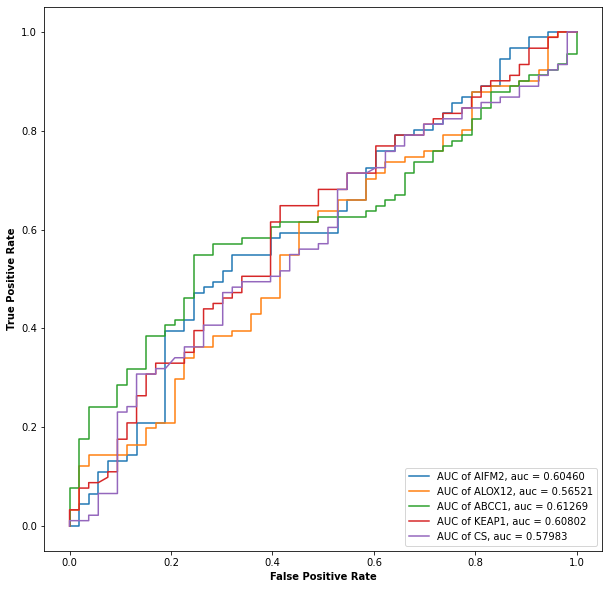

In [135]:
fig, ax = plt.subplots(figsize = (10,10))

fig.set_figheight(10)
fig.set_figwidth(10)
fig.set_facecolor('white')


# CISD1         -1.6853      0.464     -3.632      0.000      -2.595      -0.776
# HSBP1         -1.6595      0.509     -3.262      0.001      -2.657      -0.662
# PGD           -1.1922      0.477     -2.497      0.013      -2.128      -0.257
# GSS            2.5334      0.857      2.956      0.003       0.853       4.213
# GCLM           3.1088      0.948      3.279      0.001       1.251       4.967
# PEBP1         -1.2300      0.391     -3.142      0.002      -1.997      -0.463
# CS            -2.8360      0.876     -3.237      0.001      -4.553      -1.119

# df0 = df.drop(columns = ['ID','CISD1','G6PD','AKR1C3','HSBP1','ALOX5','ACO1','PHKG2','PGD','GSS','STEAP3','GCLM','PEBP1','CBS','AIFM2','ALOX12','ABCC1','KEAP1','CS'], axis = 1)
# 1   Type    716 non-null    int64  
#  2   CISD1   716 non-null    float64
#  3   G6PD    716 non-null    float64
#  4   AKR1C3  716 non-null    float64
#  5   HSBP1   716 non-null    float64
#  6   ALOX5   716 non-null    float64
#  7   ACO1    716 non-null    float64
#  8   PHKG2   716 non-null    float64
#  9   PGD     716 non-null    float64
#  10  GSS     716 non-null    float64
#  11  STEAP3  716 non-null    float64
#  12  GCLM    716 non-null    float64
#  13  PEBP1   716 non-null    float64
#  14  CBS     716 non-null    float64
#  15  AIFM2   716 non-null    float64
#  16  ALOX12  716 non-null    float64
#  17  ABCC1   716 non-null    float64
#  18  KEAP1   716 non-null    float64
#  19  CS      716 non-null    float64

# ax.plot(LR_eval0['fpr'], LR_eval0['tpr'], label='AUC of CISD1, auc = {:0.5f}'.format(LR_eval0['auc']))
# ax.plot(LR_eval1['fpr'], LR_eval1['tpr'], label='AUC of G6PD, auc = {:0.5f}'.format(LR_eval1['auc']))
# ax.plot(LR_eval2['fpr'], LR_eval2['tpr'], label='AUC of AKR1C3, auc = {:0.5f}'.format(LR_eval2['auc']))
# ax.plot(LR_eval3['fpr'], LR_eval3['tpr'], label='AUC of HSBP1, auc = {:0.5f}'.format(LR_eval3['auc']))
# ax.plot(LR_eval4['fpr'], LR_eval4['tpr'], label='AUC of ALOX5, auc = {:0.5f}'.format(LR_eval4['auc']))
# ax.plot(LR_eval5['fpr'], LR_eval5['tpr'], label='AUC of ACO1, auc = {:0.5f}'.format(LR_eval5['auc']))
# ax.plot(LR_eval6['fpr'], LR_eval6['tpr'], label='AUC of PHKG2, auc = {:0.5f}'.format(LR_eval6['auc']))
# ax.plot(LR_eval7['fpr'], LR_eval7['tpr'], label='AUC of PGD, auc = {:0.5f}'.format(LR_eval7['auc']))
# ax.plot(LR_eval8['fpr'], LR_eval8['tpr'], label='AUC of GSS, auc = {:0.5f}'.format(LR_eval8['auc']))
# ax.plot(LR_eval9['fpr'], LR_eval9['tpr'], label='AUC of STEAP3, auc = {:0.5f}'.format(LR_eval9['auc']))
# ax.plot(LR_eval10['fpr'], LR_eval10['tpr'], label='AUC of GCLM, auc = {:0.5f}'.format(LR_eval10['auc']))
# ax.plot(LR_eval11['fpr'], LR_eval11['tpr'], label='AUC of PEBP1, auc = {:0.5f}'.format(LR_eval11['auc']))
# ax.plot(LR_eval12['fpr'], LR_eval12['tpr'], label='AUC of CBS, auc = {:0.5f}'.format(LR_eval12['auc']))
ax.plot(LR_eval13['fpr'], LR_eval13['tpr'], label='AUC of AIFM2, auc = {:0.5f}'.format(LR_eval13['auc']))
ax.plot(LR_eval14['fpr'], LR_eval14['tpr'], label='AUC of ALOX12, auc = {:0.5f}'.format(LR_eval14['auc']))
ax.plot(LR_eval15['fpr'], LR_eval15['tpr'], label='AUC of ABCC1, auc = {:0.5f}'.format(LR_eval15['auc']))
ax.plot(LR_eval16['fpr'], LR_eval16['tpr'], label='AUC of KEAP1, auc = {:0.5f}'.format(LR_eval16['auc']))
ax.plot(LR_eval17['fpr'], LR_eval17['tpr'], label='AUC of CS, auc = {:0.5f}'.format(LR_eval17['auc']))
# ax.plot(LR_eval18['fpr'], LR_eval18['tpr'], label='AUC of all 19, auc = {:0.5f}'.format(LR_eval18['auc']))
# ax.plot(LR_eval19['fpr'], LR_eval19['tpr'], label='AUC of all, auc = {:0.5f}'.format(LR_eval19['auc']))

# ax.plot(knn_eval['fpr'], knn_eval['tpr'], label='K-Nearest Nieghbor, auc = {:0.5f}'.format(knn_eval['auc']))

## Configure x and y axis
ax.set_xlabel('False Positive Rate', fontweight='bold')
ax.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax.legend(loc=4)

plt.show()
fig.savefig('14-18 all AUC.png',dpi=600,bbox_inches='tight')
